<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

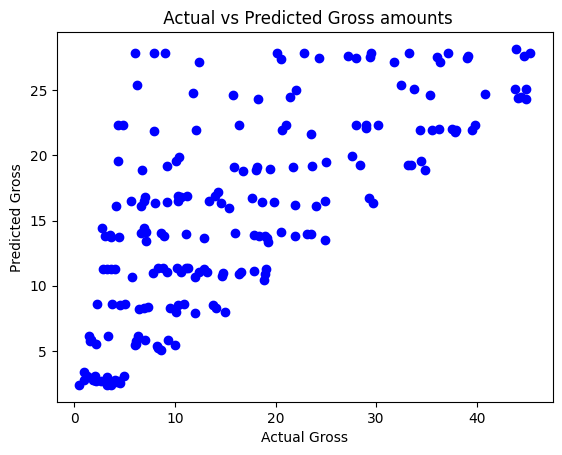

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = pd.read_csv('SuperMarket Analysis.csv')
df = data.copy()
df.info()

data.groupby('Product line')['gross income'].sum()
data.groupby('Payment')['gross income'].sum()

df = pd.get_dummies(df, columns =['Gender','Product line', 'Payment'], drop_first=True) # convert categorical columns to numbers (encoding)

X = df[[ 'Quantity', 'Gender_Male' , 'Product line_Fashion accessories',
        'Product line_Food and beverages','Product line_Health and beauty','Product line_Home and lifestyle', 
        'Payment_Ewallet', 'Payment_Credit card']] # Getting X values

        
y = df['gross income'] # getting y values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42) #split into 80% for training and 20% for testing

# use linear regression model to predict gross income
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test) # Predict totals using test data

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # compare actual vs predicted values
df_results.head()

mse = mean_squared_error(y_test, y_pred) # use mean squared error
print ("Mean squared Error = ", mse) 

plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title(" Actual vs Predicted Gross amounts")
plt.show()